**Business Understanding**

- Business Problem:
Bagaimana cara mengurangi churn rate in the Telco company dengan memprediksi probabilitas customers churn?

- Objective:
Build a model klasifikasi untuk memprediksi probabilitas churn.

**Data Cleansing**

In [13]:
import pandas as pd

In [15]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
## Check Missing Values

In [21]:
df.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
## Check outliers

In [29]:
df.select_dtypes(["int64", "float64"])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [31]:
df_num = df.select_dtypes(["int64", "float64"])
col_num = df_num.columns
col_num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [39]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df [(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for SeniorCitizen
0.0
(1142, 21)
Running for tenure
46.0
(0, 21)
Running for MonthlyCharges
54.349999999999994
(0, 21)


In [47]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df [(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

Running for SeniorCitizen
Running for tenure
Running for MonthlyCharges


In [49]:
df.shape

(5901, 21)

In [51]:
## Check duplicates

In [53]:
df.duplicated().sum()

0

In [55]:
df_clean = df.copy()
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**EDA**

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5901 non-null   object 
 1   gender            5901 non-null   object 
 2   SeniorCitizen     5901 non-null   int64  
 3   Partner           5901 non-null   object 
 4   Dependents        5901 non-null   object 
 5   tenure            5901 non-null   int64  
 6   PhoneService      5901 non-null   object 
 7   MultipleLines     5901 non-null   object 
 8   InternetService   5901 non-null   object 
 9   OnlineSecurity    5901 non-null   object 
 10  OnlineBackup      5901 non-null   object 
 11  DeviceProtection  5901 non-null   object 
 12  TechSupport       5901 non-null   object 
 13  StreamingTV       5901 non-null   object 
 14  StreamingMovies   5901 non-null   object 
 15  Contract          5901 non-null   object 
 16  PaperlessBilling  5901 non-null   object 
 17  

In [62]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df_clean["TotalCharges"] = df_clean["TotalCharges"].astype("float64")

ValueError: could not convert string to float: ' '

In [68]:
df_clean = df_clean [~(df_clean["TotalCharges"] == " ")]
df_clean["TotalCharges"] = df_clean["TotalCharges"].astype("float64")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5890 non-null   object 
 1   gender            5890 non-null   object 
 2   SeniorCitizen     5890 non-null   int64  
 3   Partner           5890 non-null   object 
 4   Dependents        5890 non-null   object 
 5   tenure            5890 non-null   int64  
 6   PhoneService      5890 non-null   object 
 7   MultipleLines     5890 non-null   object 
 8   InternetService   5890 non-null   object 
 9   OnlineSecurity    5890 non-null   object 
 10  OnlineBackup      5890 non-null   object 
 11  DeviceProtection  5890 non-null   object 
 12  TechSupport       5890 non-null   object 
 13  StreamingTV       5890 non-null   object 
 14  StreamingMovies   5890 non-null   object 
 15  Contract          5890 non-null   object 
 16  PaperlessBilling  5890 non-null   object 
 17  

In [70]:
## Univariate Analysis

In [84]:
df_num = df_clean.select_dtypes(["int64","float64"])
num_col = df_num.columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [86]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5890.0,5890.000000,5890.000000,5890.000000
mean,0.0,32.252292,61.885594,2181.089550
std,0.0,24.612263,30.315567,2233.217848
min,0.0,1.000000,18.250000,18.800000
25%,0.0,9.000000,25.600000,365.575000
50%,0.0,28.000000,65.875000,1295.775000
75%,0.0,55.000000,86.787500,3566.362500
max,0.0,72.000000,118.750000,8684.800000


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

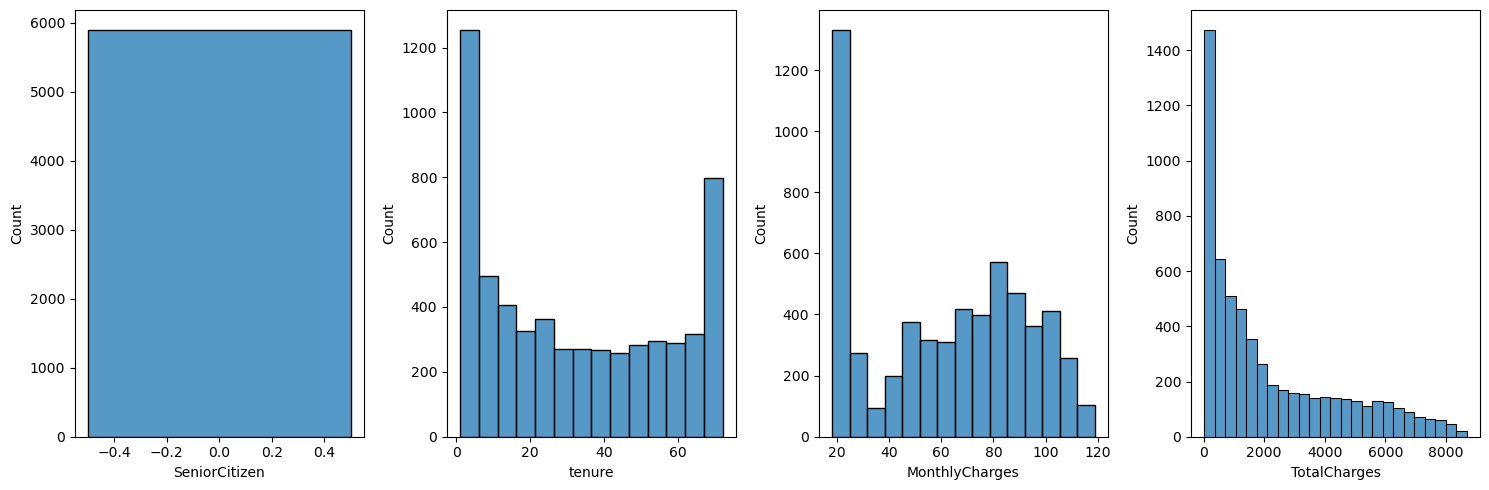

In [92]:
plt.figure(figsize = [15,5])
for i in range(len(num_col)):
    plt.subplot(1,4, i+1)
    sns.histplot(x = num_col[i], data = df_clean)
    plt.tight_layout()

In [94]:
# Multivariate Analysis

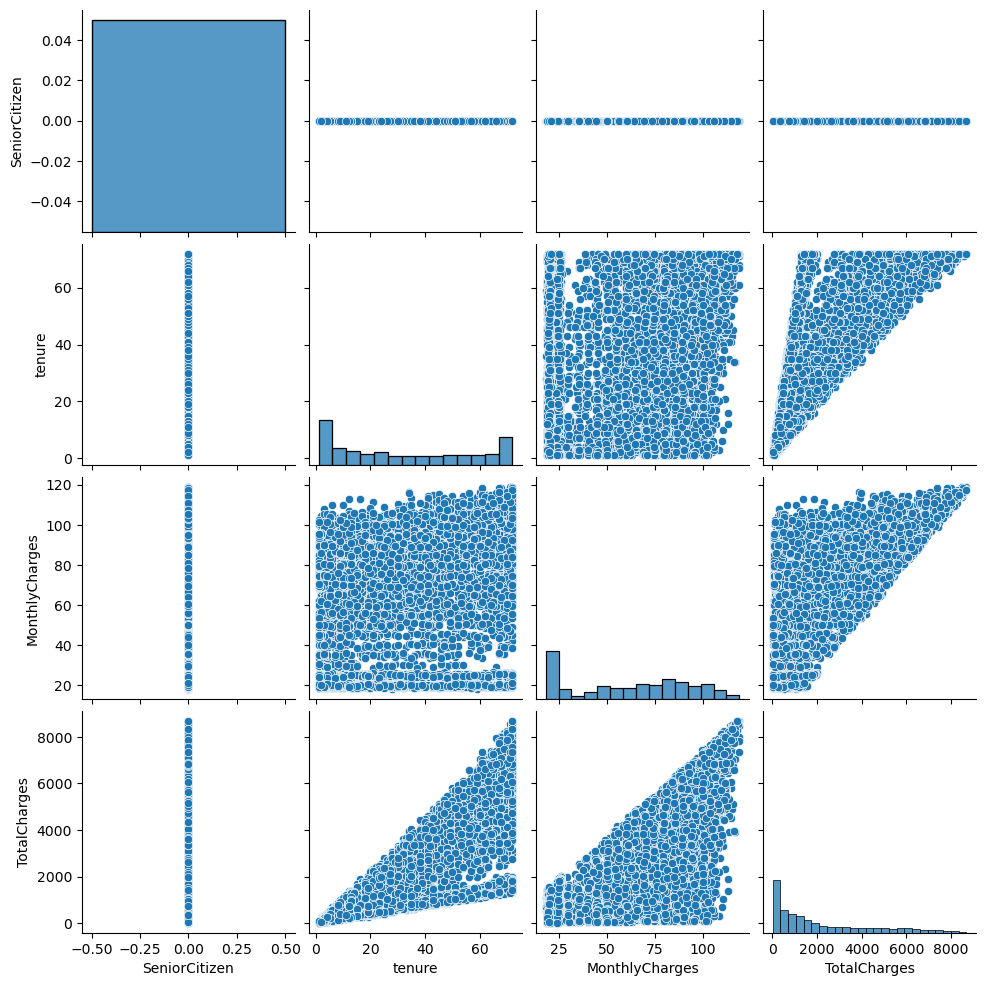

In [96]:
sns.pairplot(df_clean[num_col])

<Axes: >

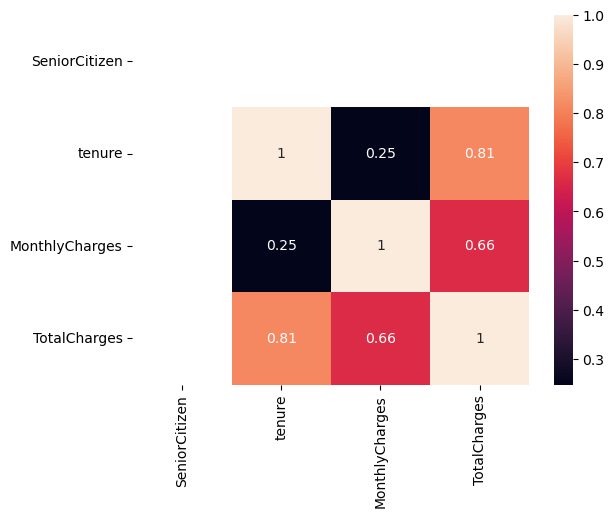

In [102]:
#heatmap
sns.heatmap(df_clean[num_col].corr(), annot = True) #cek korelasi

**Additional Data Preparation before Modeling**

In [105]:
## Feature Engineering

In [111]:
df_clean["TotalCharges_per_tenure"] = df_clean["TotalCharges"] / df_clean["tenure"]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               5890 non-null   object 
 1   gender                   5890 non-null   object 
 2   SeniorCitizen            5890 non-null   int64  
 3   Partner                  5890 non-null   object 
 4   Dependents               5890 non-null   object 
 5   tenure                   5890 non-null   int64  
 6   PhoneService             5890 non-null   object 
 7   MultipleLines            5890 non-null   object 
 8   InternetService          5890 non-null   object 
 9   OnlineSecurity           5890 non-null   object 
 10  OnlineBackup             5890 non-null   object 
 11  DeviceProtection         5890 non-null   object 
 12  TechSupport              5890 non-null   object 
 13  StreamingTV              5890 non-null   object 
 14  StreamingMovies          5890

In [113]:
## One Hot Encoding

In [117]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000


In [121]:
df_clean.drop(columns = ["customerID"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,19.713889
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,82.937500
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,102.262500
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,31.495455


In [123]:
df_clean = df_clean.drop(columns = ["customerID"])

In [127]:
string_df = df_clean.select_dtypes(["object"])
string_col = string_df.columns

In [129]:
pd.get_dummies(df_clean)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,29.850000,True,False,False,True,True,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,55.573529,False,True,True,False,True,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,54.075000,False,True,True,False,True,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,40.905556,False,True,True,False,True,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,75.825000,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,21.15,1419.40,19.713889,True,False,True,False,True,...,False,True,False,True,True,False,False,False,True,False
7038,0,24,84.80,1990.50,82.937500,False,True,False,True,False,...,True,False,False,True,False,False,False,True,True,False
7039,0,72,103.20,7362.90,102.262500,True,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False
7040,0,11,29.60,346.45,31.495455,True,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False


In [131]:
string_df = df_clean.select_dtypes(["object"])
string_col = string_df.columns.tolist()
string_col.remove("Churn")

In [133]:
pd.get_dummies(df_clean, columns = string_col)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,29.850000,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,No,55.573529,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,54.075000,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,40.905556,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,75.825000,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,21.15,1419.40,No,19.713889,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False
7038,0,24,84.80,1990.50,No,82.937500,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,No,102.262500,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,No,31.495455,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False


In [135]:
df_final = pd.get_dummies(df_clean, columns = string_col)

In [137]:
df_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,29.850000,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,No,55.573529,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,54.075000,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,40.905556,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,75.825000,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [139]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5890 non-null   int64  
 1   tenure                                   5890 non-null   int64  
 2   MonthlyCharges                           5890 non-null   float64
 3   TotalCharges                             5890 non-null   float64
 4   Churn                                    5890 non-null   object 
 5   TotalCharges_per_tenure                  5890 non-null   float64
 6   gender_Female                            5890 non-null   bool   
 7   gender_Male                              5890 non-null   bool   
 8   Partner_No                               5890 non-null   bool   
 9   Partner_Yes                              5890 non-null   bool   
 10  Dependents_No                            5890 non-nul

In [141]:
## train test split

In [155]:
X = df_final.drop(columns = ["Churn"])
y = df_final["Churn"].map({"No":0, "Yes":1})

In [159]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,29.850000,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,55.573529,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,54.075000,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,40.905556,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,75.825000,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,21.15,1419.40,19.713889,True,False,True,False,True,...,False,False,False,True,False,True,True,False,False,False
7038,0,24,84.80,1990.50,82.937500,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,102.262500,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,31.495455,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [149]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7037    0
7038    0
7039    0
7040    0
7042    0
Name: Churn, Length: 5890, dtype: int64

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [163]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4123, 46)
(1767, 46)
(4123,)
(1767,)


**Modeling & Evaluation**

In [168]:
## Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [174]:
## Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
## Hyperparameter Tuning
params = {
    "max_depth" : [2,3,4,5,7,10,15],
    "min_samples_leaf" : [10,15,25,50,100]
    
}

In [182]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 10,
                           scoring = "roc_auc"
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 15],
                         'min_samples_leaf': [10, 15, 25, 50, 100]},
             scoring='roc_auc')

In [183]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25)

## Evaluation

In [189]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)

In [191]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.48866498740554154
0.4634760705289673
0.4181360201511335


In [195]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.4630071599045346
0.6195286195286195
0.694560669456067


In [199]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rf_best = rf_best.predict_proba(X_test)[:,1]

In [201]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rf_best))

0.6618424681461325
0.8349427273897296
0.8641306146463439


#### Business Conclusion

Business Impact:

Final Model = Decision Tree
Recall = 48%, Precision = 46%

Assume for every 100 customers, churned = 20
1. Before the model:
   - Cost = 100 * 50K = 5 mio
   - Revenue = 80 * 100K = 8 mio
   - Profit = 3 mio
     
2. After the model:
   - Cost = Churned/Precision * 50K
          = 20/0.46 * 50K
          = 43 * 50K = 2.2 mio
   - Revenue = (80 + Recall * Churned) * 100K
             = (80 + 0.48 * 20) * 100K
             = 90 * 100K = 9 mio
     